<a href="https://colab.research.google.com/github/EricSiq/Supervised-Machine-Learning-Lab/blob/main/Abalone_Age_using_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Squared Error: 5.238277511961724
   Actual Age  Predicted Age
0        10.5           12.7
1         9.5           10.3
2        17.5           16.3
3        10.5           11.9
4        15.5           12.9


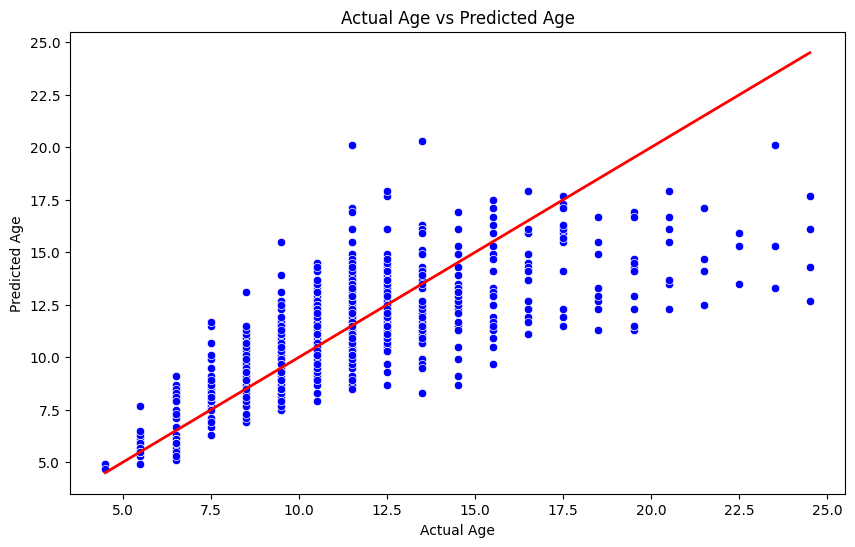

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'
columns = ['Sex', 'Length', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Rings']
df = pd.read_csv(url, names=columns)

# Convert categorical 'Sex' column to numeric
sex_mapping = {'M': 0, 'F': 1, 'I': 2}
df['Sex'] = df['Sex'].map(sex_mapping)

df['Age'] = df['Rings'] + 1.5
df.drop(['Rings'], axis=1, inplace=True)

# Splitting data into features and target
X = df.drop('Age', axis=1)
y = df['Age']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train KNN model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Compare Actual vs. Predicted
results = pd.DataFrame({'Actual Age': y_test.values, 'Predicted Age': y_pred})
print(results.head())

# Plotting Predicted vs Actual
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Actual Age vs Predicted Age')
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.show()
